In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from sklearn.model_selection import cross_val_score, KFold


In [3]:
# 1. Đọc dữ liệu từ file CSV
df = pd.read_csv('Gold_Price.csv')

In [4]:
# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2227 non-null   object 
 1   Price   2227 non-null   int64  
 2   Open    2227 non-null   int64  
 3   High    2227 non-null   int64  
 4   Low     2227 non-null   int64  
 5   Volume  2227 non-null   int64  
 6   Chg%    2227 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.9+ KB
None


In [5]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [6]:
def compare_predictions(y_test, y_pred, model_name):
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"\nComparison for {model_name} model:")
    print(comparison.head())  # Hiển thị 5 giá trị đầu tiên

In [7]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1/1/2014,29542,29435,29598,29340,2930,0.25
1,1/2/2014,29975,29678,30050,29678,3140,1.47
2,1/3/2014,29727,30031,30125,29539,3050,-0.83
3,1/4/2014,29279,29279,29279,29279,0,-1.51
4,1/6/2014,29119,29300,29395,29051,24380,-0.55


# TIỀN XỬ LÍ DỮ LIỆU

In [8]:
X = df.drop(columns=['Price', 'Date'])  # Loại bỏ cột 'Price' và 'Date' nếu không sử dụng cột Date
y = df['Price']  # Cột mục tiêu

In [9]:
X.head()


,Open,High,Low,Volume,Chg%
0,29435,29598,29340,2930,0.25
1,29678,30050,29678,3140,1.47
2,30031,30125,29539,3050,-0.83
3,29279,29279,29279,0,-1.51
4,29300,29395,29051,24380,-0.55


In [10]:
y.head()

0    29542
1    29975
2    29727
3    29279
4    29119
Name: Price, dtype: int64

In [11]:
# 3. Chia dữ liệu thành tập huấn luyện và kiểm thử (70% huấn luyện, 30% kiểm thử)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# HỒI QUY TUYẾN TÍNH

In [12]:
# 4. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
compare_predictions(y_test, y_pred_lr, "Linear Regression")


Comparison for Linear Regression model:
      Actual     Predicted
56     30169  30171.247734
494    25490  25449.332489
1676   47907  47804.284353
218    26940  26834.734397
744    30057  30029.967206


In [13]:

# Dự đoán trên tập kiểm tra
y_pred_lr = model_lr.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_lr)
rmse_linear = math.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_linear = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R2: {r2_linear}")

Linear Regression - MAE: 62.84603297789227, RMSE: 94.42474289428458, R2: 0.9998930081441777


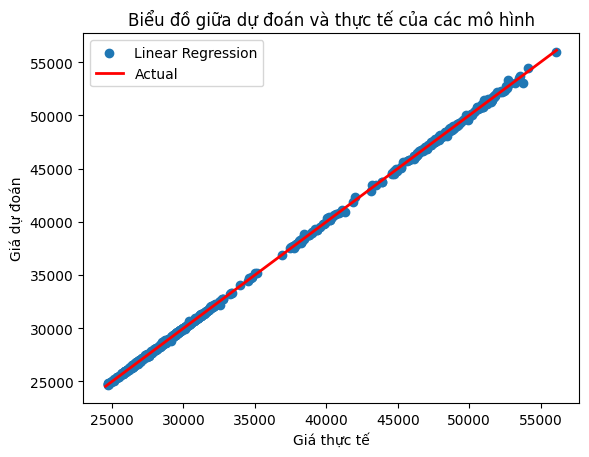

In [34]:
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Actual")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.legend()
plt.title("Biểu đồ giữa dự đoán và thực tế của mô hình")
plt.show()

# Rigde


In [17]:

# Khởi tạo và huấn luyện Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

# Đánh giá mô hình Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")


Ridge Regression - MAE: 62.8440479546778, RMSE: 94.43251050473404, R2: 0.9998929905406297


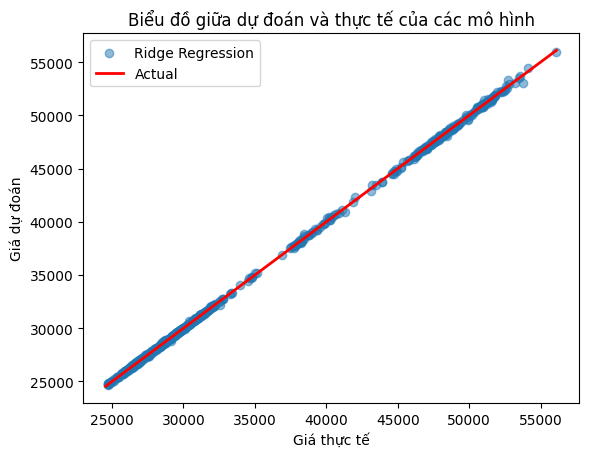

In [35]:
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Actual")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.legend()
plt.title("Biểu đồ giữa dự đoán và thực tế của mô hình")
plt.show()

# Neural network

In [20]:
# 6. Neural Network (MLPRegressor)
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50),activation='relu', max_iter=500)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
compare_predictions(y_test, y_pred_nn, "Neural Network")


Comparison for Neural Network model:
      Actual     Predicted
56     30169  30357.394520
494    25490  25573.921777
1676   47907  47586.998693
218    26940  27127.586424
744    30057  30169.103626


In [21]:
# Đánh giá mô hình Neural Network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = math.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MAE: {mae_nn}, RMSE: {rmse_nn}, R2: {r2_nn}")

Neural Network - MAE: 145.81958482770264, RMSE: 236.50105775246064, R2: 0.9993288103149076


In [22]:
# Đánh giá mô hình Neural Network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = math.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MAE: {mae_nn}, RMSE: {rmse_nn}, R2: {r2_nn}")

Neural Network - MAE: 145.81958482770264, RMSE: 236.50105775246064, R2: 0.9993288103149076


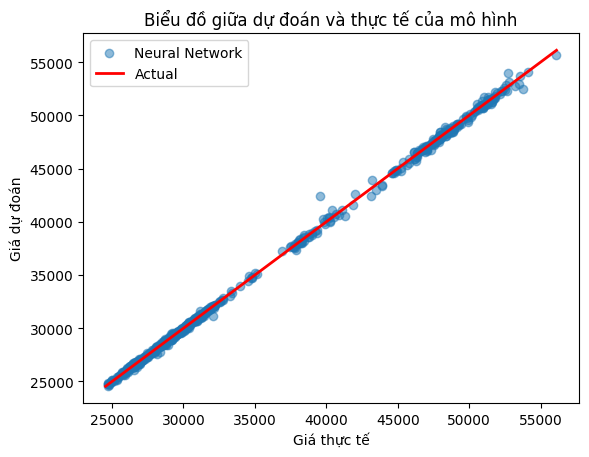

In [36]:
plt.scatter(y_test, y_pred_nn, label="Neural Network", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Actual")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.legend()
plt.title("Biểu đồ giữa dự đoán và thực tế của mô hình")
plt.show()

In [23]:
# Sử dụng 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold cho Linear Regression
cv_r2_scores_linear = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='r2')
print(f"Linear Regression R^2 scores (K-Fold): {cv_r2_scores_linear}")
print(f"Mean R^2 on training set for Linear Regression: {np.mean(cv_r2_scores_linear)}")

# K-Fold cho Ridge Regression
cv_r2_scores_ridge = cross_val_score(ridge_reg, X_train, y_train, cv=kf, scoring='r2')
print(f"Ridge Regression R^2 scores (K-Fold): {cv_r2_scores_ridge}")
print(f"Mean R^2 on training set for Ridge Regression: {np.mean(cv_r2_scores_ridge)}")

# K-Fold cho Neural Network (MLPRegressor)
cv_r2_scores_nn = cross_val_score(model_nn, X_train, y_train, cv=kf, scoring='r2')
print(f"Neural Network R^2 scores (K-Fold): {cv_r2_scores_nn}")
print(f"Mean R^2 on training set for Neural Network: {np.mean(cv_r2_scores_nn)}")

# So sánh kết quả R² trên tập kiểm tra và tập huấn luyện
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
r2_test_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 on test set for Ridge Regression: {r2_test_ridge}")

model_lr.fit(X_train, y_train)
y_pred_linear = model_lr.predict(X_test)
r2_test_linear = r2_score(y_test, y_pred_linear)
print(f"R^2 on test set for Linear Regression: {r2_test_linear}")

model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
r2_test_nn = r2_score(y_test, y_pred_nn)
print(f"R^2 on test set for Neural Network: {r2_test_nn}")

# Kiểm tra overfitting
if r2_test_ridge < np.mean(cv_r2_scores_ridge) - 0.1:
    print("Ridge model: Possible overfitting detected")
else:
    print("Ridge model: No overfitting detected")

if r2_test_linear < np.mean(cv_r2_scores_linear) - 0.1:
    print("Linear model: Possible overfitting detected")
else:
    print("Linear model: No overfitting detected")

if r2_test_nn < np.mean(cv_r2_scores_nn) - 0.1:
    print("Neural Network model: Possible overfitting detected")
else:
    print("Neural Network model: No overfitting detected")

Linear Regression R^2 scores (K-Fold): [0.99986012 0.99980978 0.99987624 0.9998614  0.99980219]
Mean R^2 on training set for Linear Regression: 0.9998419475794258
Ridge Regression R^2 scores (K-Fold): [0.99986024 0.99980977 0.99987629 0.99986123 0.99980224]
Mean R^2 on training set for Ridge Regression: 0.9998419524986808
Neural Network R^2 scores (K-Fold): [0.99951351 0.99955419 0.99957759 0.99950927 0.99944982]
Mean R^2 on training set for Neural Network: 0.9995208745345876
R^2 on test set for Ridge Regression: 0.9998929905406297
R^2 on test set for Linear Regression: 0.9998930081441777
R^2 on test set for Neural Network: 0.9993889389596299
Ridge model: No overfitting detected
Linear model: No overfitting detected
Neural Network model: No overfitting detected


In [24]:
# 7. Stacking Model
estimators = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
compare_predictions(y_test, y_pred_stack, "Stacking")


Comparison for Stacking model:
      Actual     Predicted
56     30169  30176.034382
494    25490  25453.301856
1676   47907  47797.447961
218    26940  26844.281781
744    30057  30033.003380


In [26]:
# Đánh giá mô hình Stacking
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = math.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking Model - MAE: {mae_stack}, RMSE: {rmse_stack}, R²: {r2_stack}")


Stacking Model - MAE: 62.91415605197466, RMSE: 94.9268173073936, R²: 0.9998918673269369


In [27]:
# K-Fold Cross-Validation cho Stacking Model
cv_r2_scores_stack = cross_val_score(stacking_model, X_train, y_train, cv=kf, scoring='r2')
print(f"Stacking Model R² scores (K-Fold): {cv_r2_scores_stack}")
print(f"Mean R² on training set for Stacking Model: {np.mean(cv_r2_scores_stack)}")


Stacking Model R² scores (K-Fold): [0.99986009 0.99980797 0.99987473 0.99986079 0.99980424]
Mean R² on training set for Stacking Model: 0.9998415621834


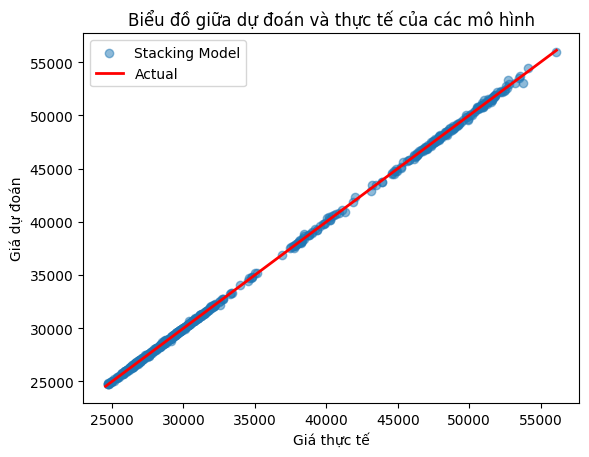

In [37]:
plt.scatter(y_test, y_pred_stack, label="Stacking Model", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Actual")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.legend()
plt.title("Biểu đồ giữa dự đoán và thực tế của các mô hình")
plt.show()


In [25]:
# 8. Đánh giá mô hình bằng các chỉ số như MSE, MAE, R²
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))
    
    

# Đánh giá từng mô hình
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network")
evaluate_model(y_test, y_pred_stack, "Stacking")


Linear Regression Model Evaluation:
MSE: 8916.032070651745
MAE: 62.84603297789227
R²: 0.9998930081441777

Ridge Regression Model Evaluation:
MSE: 8917.499040226705
MAE: 62.8440479546778
R²: 0.9998929905406297

Neural Network Model Evaluation:
MSE: 50922.005148799384
MAE: 137.84623770578344
R²: 0.9993889389596299

Stacking Model Evaluation:
MSE: 9011.100644111282
MAE: 62.91415605197466
R²: 0.9998918673269369
